# Overview

The data has been split into two groups:
-training set (train.csv)
-test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Link

Topic:
[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

Helpers:
[YT random forest](https://www.youtube.com/watch?v=fATVVQfFyU0)
[Kaggle tutorial](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
[Kaggle plots examples](https://www.kaggle.com/code/andrej0marinchenko/titanic-machine-learning-from-disaster/)
[Udemy with love](https://www.udemy.com/course/machinelearning/)

In [1615]:
# do operacji na tablicach
import pandas as pd
import numpy as np

# do splitera danych na zbiór testowy i walidacyjny
from sklearn.model_selection import StratifiedShuffleSplit

# do obróbki wykresów
from sklearn.tree import plot_tree

# do rysowania heatmapy
import seaborn as sns

# to do podmiany NaN na coś innego
from sklearn.impute import SimpleImputer

# do to rozdzielenia właściwości na inne kolumn
from sklearn.preprocessing import OneHotEncoder

# do pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# żeby był scaler
from sklearn.preprocessing import StandardScaler

# do random forestu
from sklearn.ensemble import RandomForestClassifier
# do cross validacji
from sklearn.model_selection import GridSearchCV

# do confusion matrix żęby zwizualizować wyniki ze zbioru testowego
from sklearn.metrics import confusion_matrix

# do decision tree
from sklearn.tree import DecisionTreeClassifier

# do narysowania drzewa decyzyjnego
import matplotlib.pyplot as plt

# do logistic regression
from sklearn.linear_model import LogisticRegression

# do XGBoost
from xgboost import XGBClassifier

In [1616]:
titanic_train = pd.read_csv("data/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1617]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\zagpa\AppData\Local\Temp\ipykernel_21664\543549544.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(titanic_train.corr(), cmap=cp, linecolor="white", linewidths=0.2, annot=True)


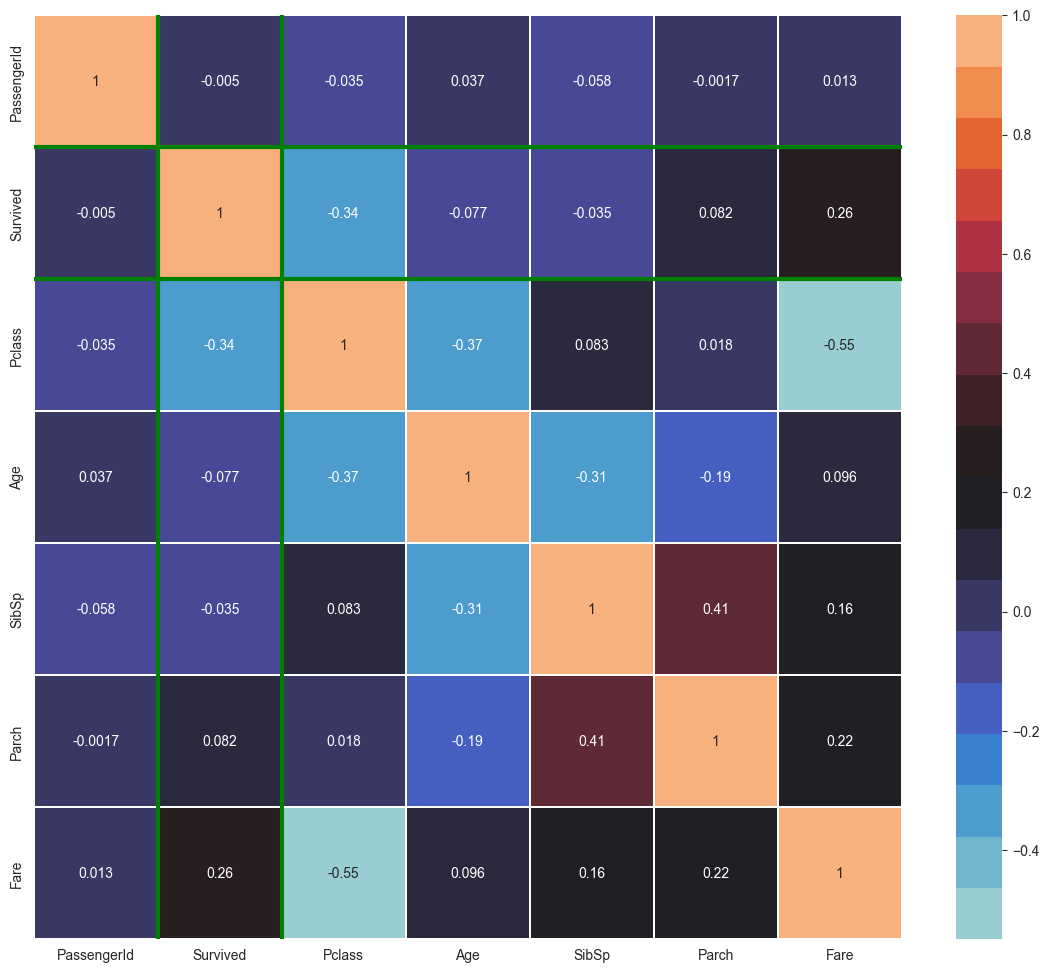

In [1618]:
# stworzenie heat mapy prezentującej korelacje między właściwościami
ax = plt.subplots(figsize =(14, 12))
cp = sns.color_palette("icefire", 18)
ax = sns.heatmap(titanic_train.corr(), cmap=cp, linecolor="white", linewidths=0.2, annot=True)
ax.hlines([1,2], *ax.get_xlim(), color= "green", linewidth=3)
ax.vlines([1,2], *ax.get_ylim(), color= "green", linewidth=3)

# Podział danych

Prawdopodobnie nie potrzebne w tym momencie - tylko informacyjnie i 'na zapas'
Wszystkie dane z niego są pominięte

In [1619]:
# tworze spliter, którym podziele dane
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# n_splits - Number of re-shuffling & splitting iterations.
# test_size - represent the proportion of the dataset to include in the test split.

In [1620]:
# spliter zdefiniowany jako klasa żeby tego wszystkiego nie powtarzać pare razy w kolejnej komórce
class Spliter(StratifiedShuffleSplit):

    def splitBy(columns):
        print(columns)
        # dzieli dane tak aby proporcje drugiej wartości były równe pomiędzy oba setami
        # po to by uniknać sytuacji (teoretycznie możliwej) że w train setcie będą tylko wartości że ktoś przeżył
        for train_index, test_index  in split.split(titanic_train, titanic_train[columns]):
            spl_train_set = titanic_train.loc[train_index]
            spl_test_set  = titanic_train.loc[test_index]
        return spl_train_set, spl_test_set


    # licze stosunek wartości umarł/przeżył między setami żeby wypisać żeby udowodnić że dzielenie przez konkretą kolumne ma sens
    def countRatio(spl_train_set, spl_test_set):
        c_spl_train_set = spl_train_set.groupby(["Survived"])["Survived"].count()
        c_spl_test_set = spl_test_set.groupby(["Survived"])["Survived"].count()
        train_ratio = c_spl_train_set[0] / c_spl_train_set[1]
        test_ratio = c_spl_test_set[0] / c_spl_test_set[1]
        print("Train ratio: " + str(train_ratio))
        print("Test ratio: " + str(test_ratio))

In [1621]:
# wypisuje na ekran stosunki przy różnych podziałach - jako dowód że spliter miał sens
t1_x, t1_y = Spliter.splitBy(["Pclass"])
Spliter.countRatio(t1_x, t1_y)
t2_x, t2_y =Spliter.splitBy(["Pclass","Survived"])
Spliter.countRatio(t2_x, t2_y)
t3_x, t3_y =Spliter.splitBy(["Survived"])
Spliter.countRatio(t3_x, t3_y)

['Pclass']
Train ratio: 1.637037037037037
Test ratio: 1.4861111111111112
['Pclass', 'Survived']
Train ratio: 1.5985401459854014
Test ratio: 1.6323529411764706
['Survived']
Train ratio: 1.6080586080586081
Test ratio: 1.5942028985507246


# Obróbka danych

In [1622]:
# musimy usupełnić puste dane w kolumnach np NaN w Age
# robimy to teraz a nie przed podziałem bo nie chcemy wpływać na dane zanim będą rozdzielone bo możemy wpłynąć na wynik końcowy
# powiedzmy że wstawiamy średni wiek do wszystkich kolumn gdzie jest NaN a średni wiek będzie inny w w zależności od tego kiedy dokonaliśmy podziału

In [1623]:
# zamiast ręcznie wszystko wywoływać za każdym razem tworzymy pipeline tzn taki ciąg zdarzeń
# zdefiniujemy pare klas, które będą modyfikować dataSet

In [1624]:
class AgeImputer(TransformerMixin):

    # tej metody wymaga pipeline
    def fit(self, dataFrame):
        return self

    # ta metoda tak nazwana bo pipeline ją wywołuje
    def transform(self, dataFrame):
        # imputer który uzupełni dane średnią wszystkich innych wartości
        imputer = SimpleImputer(strategy="mean")
        dataFrame['Age'] = imputer.fit_transform(dataFrame[['Age']])
        return dataFrame


In [1625]:
# kolumny tekstowe muszą być enkodowane bo w ML nie używamy tekstu tylko liczby
# więc musimy np C -> 0, S -> 1
# to teoretycznie by wystarczyło ale może prowadzić do błędnych predykcji
# model może szukać zależności między wierszami i jak zobaczyłby pattern to może wpłynąć na jego predykcje
# np jakby wiersze były by w kolejności żę by wychodziło 0 1 2 0 1 2 0 1 2 to może to powiązać z passangerId i prowadzić do złych predykcji
# dlatego wartości C S itd rozdzielamy do osobnych kolumn

In [1626]:
class FeatureEncoder(TransformerMixin) :

    def fit(self, dataFrame):
        return self

    def transform(self, dataFrame):
        encoder = OneHotEncoder()
        dataFrame = self.transformEmbarked(encoder, dataFrame)
        dataFrame = self.transformAge(encoder, dataFrame)
        return dataFrame

    def transformEmbarked(self, encoder, dataFrame):
        # fituje encoder z kolumną danych
        matrix = encoder.fit_transform(dataFrame[['Embarked']]).toarray()

        column_names = dataFrame['Embarked'].unique()
        # print(column_names)

        # tym .T obracamy tabele (zamiana x z y) żeby łatwo wymieniać wartości
        for i in range(len(matrix.T)):
            dataFrame[column_names[i]] = matrix.T[i]
        return dataFrame

    def transformAge(self, encoder, dataFrame):
        matrix = encoder.fit_transform(dataFrame[['Sex']]).toarray()

        column_names = dataFrame['Sex'].unique()

        for i in range(len(matrix.T)):
            dataFrame[column_names[i]] = matrix.T[i]

        return dataFrame

In [1627]:
class ColumnsDropper(TransformerMixin):

    def fit(self, dataFrame):
        return self

    def transform(self, dataFrame):
        print(dataFrame)

        # zostawiam:
            # PassengerId - żeby wiedzieć kto jest kim
            # Survived - czy umarł czy nie
            # Pclass - im lepsza klasa tym pewnie miał bliżej do szalup i go lepiej traktowano
            # SibSp, Parch - bo może trzymali się razem albo ratowali się wzajemnie
            # rozdzielone Sex - bo kobiety i dzieci przodem
            # rozdzielone Embarked - im później wsiedli tym pewnie mięli kabiny bliżej wyjścia

        # usuwam:
            # Ticket - bo randomowa nazwa
            # Name - nie zauważono korelacji imienia ze śmiertelnością
            # Cabin - brakuje mega wiele danych tutaj - titanic był podzielone na strefy i w nazwie kabiny jest strefa, mając pełne dane i wyciągając literę z nazwy model byłby dokładniejszy ale brakuje większość danych
            # Embarked - rozdzielamy to na osobne kolumny
            # Sex - rozdzielamy to na osobne kolumny
            # Fare - opłata za bilet wpływa na klasę ale nie wpływa na umieralność
            # np.nan - podczas użycia dataFrame['Embarked'].unique() jeżeli istniały kolumny puste tzn z NaN to zostały dodane kolumny z nazwą "NaN". To nie jest nazwa testowa tylko taka 'pusta'
            # nie możemy jej usunać wpisująć jej nazwę "NaN" tylko musimy dosłownie powiedzieć że jest to puste wiec np.nan
        # może się okazać, że w ogóle nie było jakieś tej kolumny to olewamy errors=ignore
        return dataFrame.drop(["Ticket", "Name", "Cabin", "Embarked", "Sex", np.nan, "Fare"], axis=1, errors="ignore")


In [1628]:
# tworzymy pipeline przez który mozna przepuścić dane i zostaną obropione po kolei przez każdą klasę
pipeline = Pipeline([("AgeImputer", AgeImputer()),
                     ("FeatureEncoder", FeatureEncoder()),
                     ("ColumnsDropper", ColumnsDropper())])

In [1629]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1630]:
# transofmracja danych treningowych

transformed_train_set = pipeline.fit_transform(titanic_train)
transformed_train_set.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,S,C,Q,male,female
0,1,0,3,22.0,1,0,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,0.0,0.0,1.0,0.0,1.0


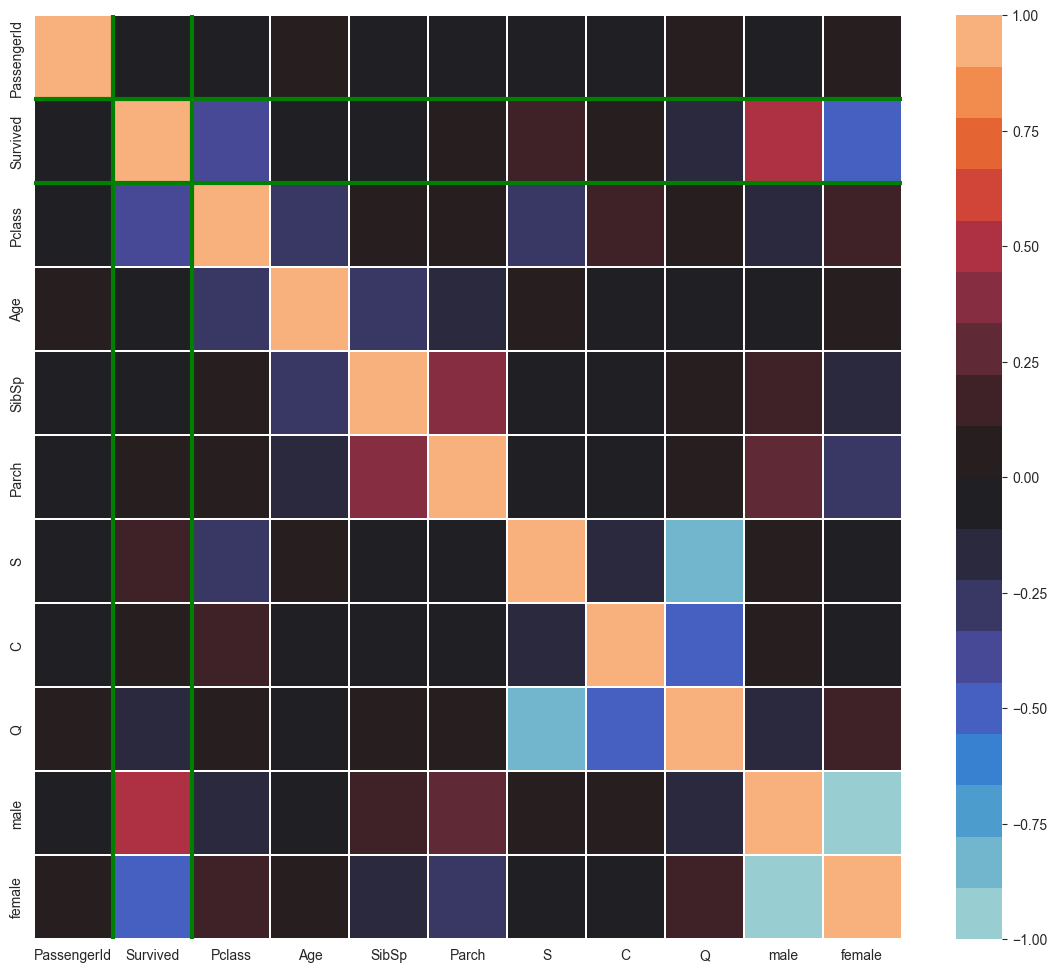

In [1631]:
ax = plt.subplots(figsize =(14, 12))
ax = sns.heatmap(transformed_train_set.corr(), cmap=cp, linecolor="white", linewidths=0.2)
ax.hlines([1, 2], *ax.get_xlim(), color="green", linewidth=3)
ax.vlines([1, 2], *ax.get_ylim(), color="green", linewidth=3)

In [1632]:
# transofmracja danych testowych
# tutaj żeby rozdzielić 'moduły' dokumentu

titanic_test = pd.read_csv("data/test.csv")
transformed_test_set = pipeline.fit_transform(titanic_test)
# fillna wypełnia NA/NaN wartościami według metody: ffill -> propaguj ostatnią ważną obserwację do następnego ważnego uzupełnienia

transformed_test_set = transformed_test_set.fillna(method="ffill")
transformed_test_set.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex       Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.50000      0      0 

,PassengerId,Pclass,Age,SibSp,Parch,Q,S,C,male,female
0,892,3,34.5,0,0,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,0.0,0.0,1.0,1.0,0.0


In [1633]:
# Standaryzacja danych do modeli machine learning polega na przekształceniu danych pierwotnych, aby ich rozkład miał średnią wartość równą 0 i odchylenie standardowe równe 1. Od każdej wartość w kolumnie danych będzie odejmowana średnia wartość kolumny, a następnie to co wyjdzie będzie podzielona przez odchylenie standardowe kolumny danych. Opisany proces dotyczy każdej kolumny oddzielnie.
# http://sigmaquality.pl/uncategorized/standaryzacja-danych-do-modeli-machine-learning-za-pomoca-standardscaler/
# w skrócie zmienia zwykłe dane w -1.51772497e+00  8.20947424e-01 -6.31268373e-01

In [1634]:
class ScalerSpliter():

    scaler = StandardScaler()

    def fitAndSplit(self, dataFrame):
        # dzielimy trainset -> właściwości / wyniki
        X = dataFrame.drop(['Survived'], axis=1)
        Y = dataFrame['Survived']

        # dopasowywujemy fit'er do danych
        X_data = self.scaler.fit_transform(X)
        # musimy to przekonwertować do numpy arraya
        Y_data = Y.to_numpy()

        return X_data, Y_data

    def transform(self, dataFrame) :
        try:
            dataFrame = dataFrame.drop(['Survived'], axis=1)
        except:
            pass
        return self.scaler.transform(dataFrame)

    def split(self, dataFrame) :
        # dzielimy trainset -> właściwości / wyniki
        X = dataFrame.drop(['Survived'], axis=1)
        Y = dataFrame['Survived']

        X_data = self.scaler.transform(X)
        Y_data = Y.to_numpy()

        return X_data, Y_data

In [1635]:
# stworze tutaj obiekt raz i będę go używać też w modelu testowym
# scaler fitujemy do traningowego setu i wykorzystujemy go później w testowym - przez wszystkie uśrednienia i dopasowania
spliter = ScalerSpliter()

# Metody predykcji

# Decision tree

Predykcja używając decision tree. Zamiast zbioru walidacyjnego używam cross-validation

In [1636]:
X_train_tree, Y_train_tree = spliter.fitAndSplit(transformed_train_set)

In [1637]:
# opis w random forest niżej
tree_clf = DecisionTreeClassifier()

tree_param_grid = [
    {
        "max_depth": [5, 10, 30],
        "random_state": [0]
    }
]

tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=3, scoring="accuracy", return_train_score=True)
tree_grid_search = tree_grid_search.fit(X_train_tree, Y_train_tree)
tree_clf = tree_grid_search.best_estimator_
tree_clf

DecisionTreeClassifier(max_depth=5, random_state=0)

In [1638]:
X_test_tree = spliter.transform(transformed_test_set)

C:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [1639]:
tree_predictions = tree_clf.predict(X_test_tree)

In [1640]:
final_tree_table = pd.DataFrame(titanic_test['PassengerId'])
final_tree_table['Survived'] = tree_predictions
final_tree_table

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(0.45930232558139533, 0.9166666666666666, 'X[9] <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2441860465116279, 0.75, 'X[1] <= 0.229\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.10465116279069768, 0.5833333333333334, 'X[2] <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.046511627906976744, 0.4166666666666667, 'X[1] <= -0.968\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023255813953488372, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06976744186046512, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16279069767441862, 0.4166666666666667, 'X[1] <= -0.968\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.11627906976744186, 0.25, 'X[0] <= -1.009\ngini = 0.042\nsamples = 93\nvalue = [2, 91]'),
 Text(0.09302325581395349, 0.08333333333333333, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.13953488372093023, 0.08333333333333333, 'gini = 0.024\nsamples = 82\nvalue = [1, 81]'),
 Text(0.209

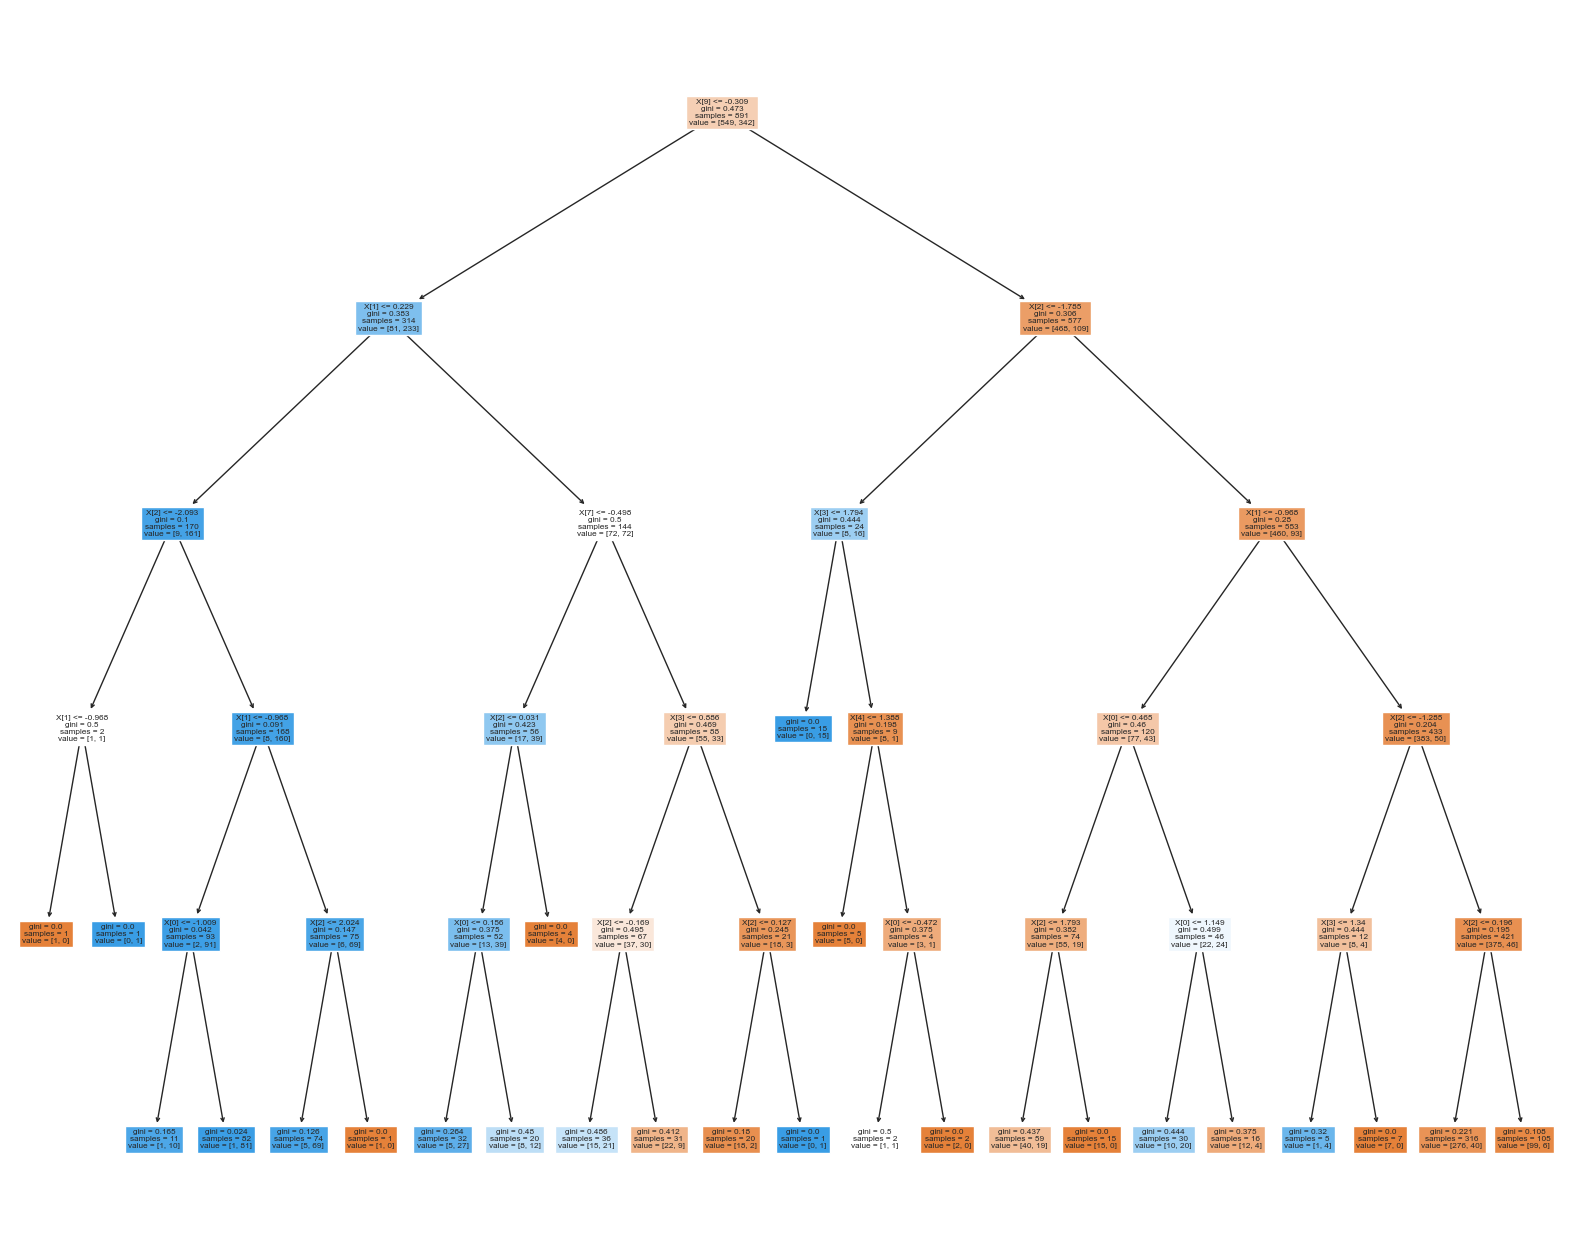

In [1641]:
plt.subplots(figsize=(20, 16))
plot_tree(tree_clf, filled=True)

In [1642]:
# zapis do pliku <- i to wysyłamy do kaggla
final_tree_table.to_csv("results/tree.csv", index=False)

In [1643]:
# trochę statystyk do zbioru testowego na podstawie gotowego drzewa decyzyjnego

In [1644]:
tree_predictions_train = tree_clf.predict(X_train_tree)
confusion_matrix(Y_train_tree, tree_predictions_train)

array([[503,  46],
       [ 81, 261]], dtype=int64)

In [1645]:
tree_clf.score(X_train_tree, Y_train_tree)

0.8574635241301908

## Random forest

Predykcja używając random forest. Zamiast zbioru walidacyjnego używam cross-validation

In [1646]:
X_train_forest, Y_train_forest = spliter.fitAndSplit(transformed_train_set)

In [1647]:
# w zależności od hiperparametrów model będzie miał różne wyniki
# to pomoże nam zdecydować, jakie parametry są najlepsze
forest_clf = RandomForestClassifier()

# parametry random forestu
# będą wypróbowane wszystkie w różnych kombinacjach np 10 None 2 / 10 None 3 / 10 None 4 itd
forest_param_grid = [
    {
        "n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2,3,4]
    }
]

# cross validation tzn program dzieli dataSet na np 10 części
# 9 częściami trenuje dane, 1 testuje
# przerabiam wszystkie kombinacje tak żeby każdy 'fold'/część była użyta raz jako walidacja
# i tak GridSearchCV znajduje optymalną kombinacje hiperparametrów
# parametr - cv to ile foldów
forest_grid_search = GridSearchCV(forest_clf, forest_param_grid, cv=3, scoring="accuracy", return_train_score=True)
forest_grid_search = forest_grid_search.fit(X_train_forest, Y_train_forest)
forest_clf = forest_grid_search.best_estimator_
forest_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

In [1648]:
# teraz sprawdzenie na danych testowych jaka jest dokładność

In [1649]:
X_test_forest = spliter.transform(transformed_test_set)
forest_predictions = forest_clf.predict(X_test_forest)

C:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [1650]:
# otrzymamy tylko predykcje tak więc musimy 'odtworzyć' pełną tabele
final_forest_table = pd.DataFrame(titanic_test['PassengerId'])
final_forest_table['Survived'] = forest_predictions
final_forest_table

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1651]:
# zapis do pliku <- i to wysyłamy do kaggla
final_forest_table.to_csv("results/random_forest.csv", index=False)

In [1652]:
# trochę statystyk do zbioru testowego na podstawie gotowego random forestu

In [1653]:
forest_train_set_predictions = forest_clf.predict(X_train_forest)

# confusion matrix na podstawie danych testowych
confusion_matrix(Y_train_forest, forest_train_set_predictions)

array([[504,  45],
       [ 96, 246]], dtype=int64)

In [1654]:
# wynik modelu - podliczone to co w confusion matrixie
forest_clf.score(X_train_forest, Y_train_forest)

0.8417508417508418

# Logistic regression

Zamiast cross-validation podziele zbiór testowy i testowy i walidacyjny żeby dobrać najlepsze hiperparametry. Później gdy będą dobrane hiperparametry przepuszczę wszystkie dane żeby wytrenować model.

In [1655]:
splited_train_train_log, splited_train_validation_log  = Spliter.splitBy(["Survived"])

['Survived']


In [1656]:
print(splited_train_train_log["PassengerId"].count())
print(splited_train_validation_log["PassengerId"].count())

712
179


In [1657]:
transformed_splited_train_train_log = pipeline.fit_transform(splited_train_train_log)
transformed_splited_train_validation_log = pipeline.fit_transform(splited_train_validation_log)

     PassengerId  Survived  Pclass  \
632          633         1       1   
306          307         1       1   
64            65         0       1   
528          529         0       3   
172          173         1       3   
..           ...       ...     ...   
214          215         0       3   
14            15         0       3   
466          467         0       2   
700          701         1       1   
103          104         0       3   

                                                  Name     Sex        Age  \
632                          Stahelin-Maeglin, Dr. Max    male  32.000000   
306                            Fleming, Miss. Margaret  female  29.699118   
64                               Stewart, Mr. Albert A    male  29.699118   
528                          Salonen, Mr. Johan Werner    male  39.000000   
172                       Johnson, Miss. Eleanor Ileen  female   1.000000   
..                                                 ...     ...        ...   
214 

In [1658]:
X_train_train_log, Y_train_train_log = spliter.fitAndSplit(transformed_splited_train_train_log)
# poprzednie były treningowymi a te walidcyjnymi więc tylko transform na spliterze
X_train_validation_log, Y_train_validation_log = spliter.split(transformed_splited_train_validation_log)

In [1659]:
log_clf = LogisticRegression(
    random_state=0,
    max_iter=1000
)
# fituje treningowe
log_clf.fit(X_train_train_log, Y_train_train_log)
# sprawdzam wynik na walidacyjnych
log_clf.score(X_train_validation_log, Y_train_validation_log)
# jakbym chciał lepsze wyniki to mogę spróbować wybrać lepsze hiperaparamety i puścić to pare razy
# ale robie to 'automatycznie' cross-validaiton i tutaj się nie bawie

0.7597765363128491

In [1660]:
X_train_log, Y_train_log = spliter.fitAndSplit(transformed_train_set)

In [1661]:
# fituje pełne dane do obliczeń z dobranymi odpowiednimi hiperparametrami
log_clf.fit(X_train_log, Y_train_log)

LogisticRegression(max_iter=1000, random_state=0)

In [1662]:
# i teraz predykcje na zbiorze otrzymanym

In [1663]:
X_test_log = spliter.transform(transformed_test_set)

C:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [1664]:
log_predictions = log_clf.predict(X_test_tree)

In [1665]:
final_log_table = pd.DataFrame(titanic_test['PassengerId'])
final_log_table['Survived'] = log_predictions
final_log_table

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1666]:
# zapis do pliku <- i to wysyłamy do kaggla
final_log_table.to_csv("results/reg_log.csv", index=False)

In [1667]:
# trochę statystyk do zbioru testowego na podstawie gotowego logistic regression

In [1668]:
log_predictions_train = log_clf.predict(X_train_tree)
confusion_matrix(Y_train_log, log_predictions_train)

array([[473,  76],
       [100, 242]], dtype=int64)

In [1669]:
log_clf.score(X_train_log, Y_train_log)

0.8024691358024691

# XGB Classifier

In [1670]:
X_train_xgb, Y_train_xgb = spliter.fitAndSplit(transformed_train_set)

In [1671]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_xgb, Y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1672]:
X_test_xgb = spliter.transform(transformed_test_set)

C:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [1673]:
xgb_predictions = xgb_clf.predict(X_test_xgb)

In [1674]:
final_xgb_table = pd.DataFrame(titanic_test['PassengerId'])
final_xgb_table['Survived'] = xgb_predictions
final_xgb_table

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1675]:
# zapis do pliku <- i to wysyłamy do kaggla
final_xgb_table.to_csv("results/xgb.csv", index=False)

In [1676]:
# trochę statystyk do zbioru testowego na podstawie gotowego xbt

In [1677]:
xgb_clf.score(X_train_xgb, Y_train_xgb)

0.9910213243546577

In [1678]:
xgb_predictions = xgb_clf.predict(X_train_xgb)

In [1679]:
confusion_matrix(Y_train_xgb, xgb_predictions)

array([[548,   1],
       [  7, 335]], dtype=int64)